In [37]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load Dataset
iris = load_iris()
n_classes = 3
plot_colors = ["red", "yellow", "blue"]  # explicit colors for 3 classes
plot_step = 0.02



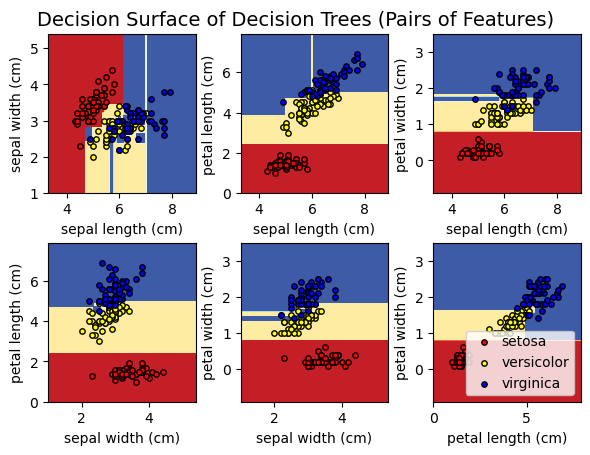

In [38]:
# Generate all 6 pairs of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

    # Select the two features for this plot
    X = iris.data[:, pair]
    y = iris.target

    # Train Decision Tree on these two features
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot setup
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # Predict on the mesh grid to get decision boundaries
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot filled contour (decision region)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # Plot training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1],
            c=color,
            label=iris.target_names[i],
            #cmap=plt.cm.viridis,
            edgecolor="black",
            s=15
        )
plt.suptitle("Decision Surface of Decision Trees (Pairs of Features)", fontsize=14)
plt.legend(loc="lower right", borderpad=0.3, handletextpad=0.3)
plt.axis("tight")
plt.show()


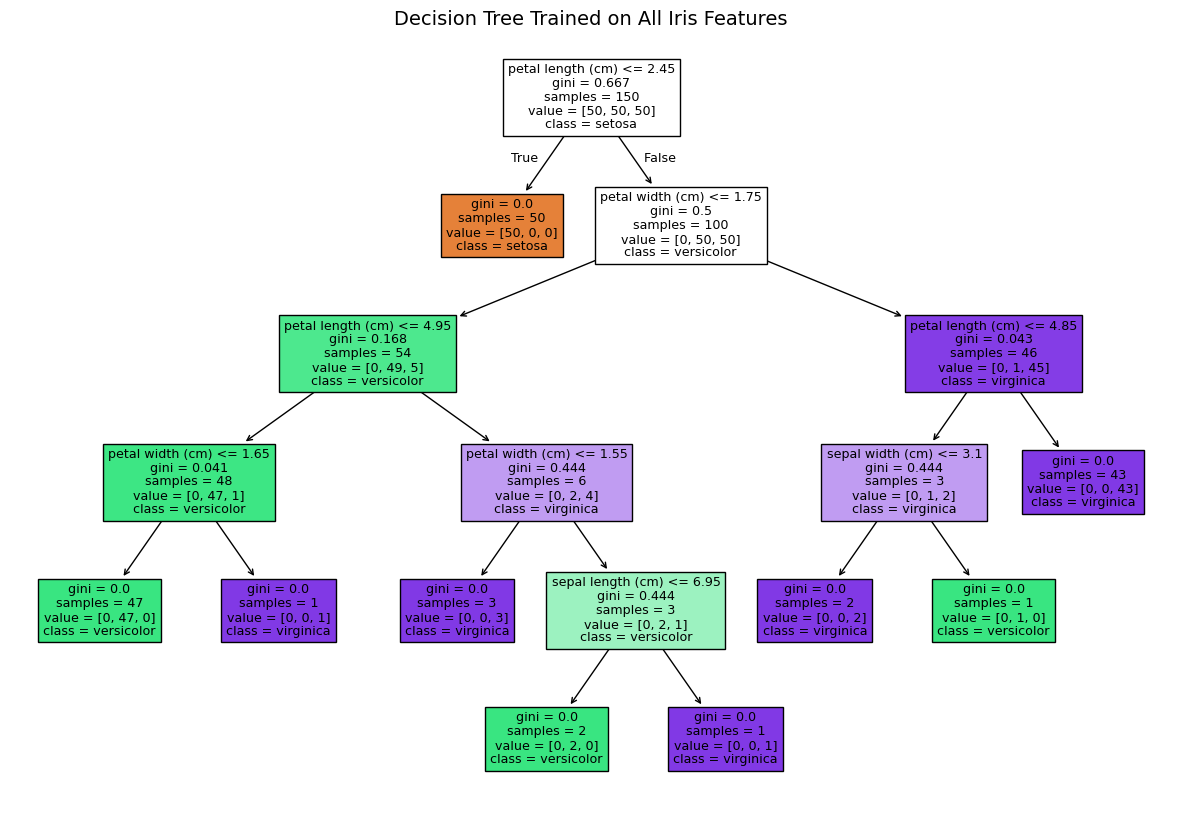

In [39]:
# Full Decision Tree Using All Features
plt.figure(figsize=(15, 10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on All Iris Features", fontsize=14)
plt.show()
